# NAREB Case: Connecting Black Intergenerational Families to Better Homes in King County, WA

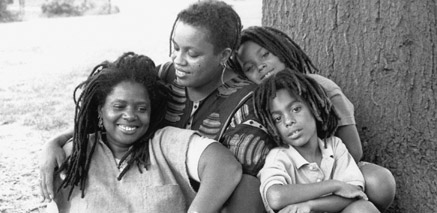

* Beau Morton 
* Part Time: 60 Weeks
* Estimated Finish: Dec 2022 
* Instructor name: Claude Fried

## Overview

Black Families in King County, Washington

Public Health – Seattle & King County is committed to working in stronger and better-resourced
partnerships with community organizations and leaders to disrupt and dismantle racism. We recognize that historically and currently, King County has been complicit in maintaining and perpetuating structural racism, and that as an institution we must be a vital player in dismantling oppressive systems that are grounded in white supremacy.

## Business Case 

Client: National Association for Real Estate Brokers (NAREB) A black led organization that focuses on bringing together the minority professionals in the real estate industry to promote the meaningful exchange of ideas about our business and how best to serve their clientele. For this case the clientele will focus on black intergenerational families. 

How can home renovations increase the estimated value of homes for black families in King County, WA? (specifically focusing on intergenerational homes) 

## Data Understanding 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [17]:
#In this section, we'll introduce our first machine learning model - linear regression. It's really just a fancy way of saying "(straight) line of best fit", but it will introduce a number of concepts that will be important as you continue to learn about more sophisticated models.

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
df.info

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  .

In [20]:
df.describe

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view 

In [21]:
print(df['price'].describe(),df['sqft_living'].describe(),df['grade'].describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64 count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64 count         21597
unique           11
top       7 Average
freq           8974
Name: grade, dtype: object


In [22]:
print(df['grade'].describe())

count         21597
unique           11
top       7 Average
freq           8974
Name: grade, dtype: object


# First Iteration

## Dealing with Categorical Data 

In [23]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [24]:
df.drop(['zipcode'], axis =1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


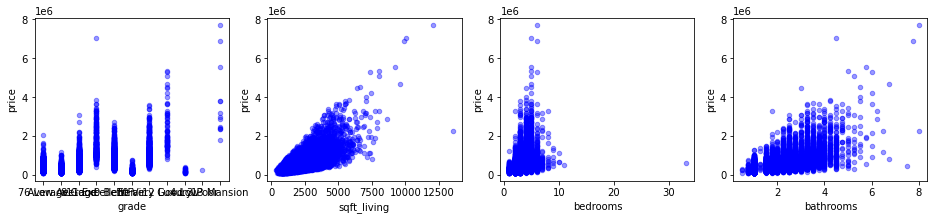

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_living', 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

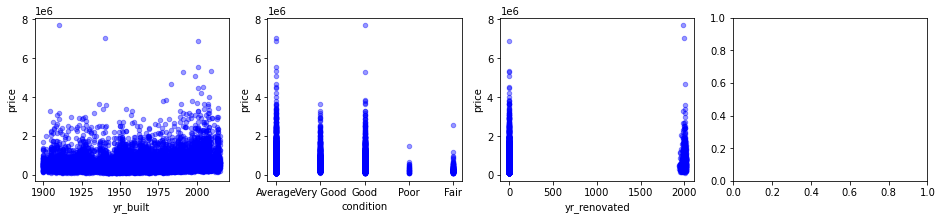

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'condition', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'condition', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
grd_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
ren_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_ren', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

In [ ]:
data = df.drop(['grade','yr_renovated','condition'], axis=1)

In [ ]:
data = pd.concat([data, grd_dummies, ren_dummies, cond_dummies], axis=1)
data.head()

In [ ]:
df.describe()

In [ ]:
data.describe()

## Multicollinearity of Features

In [49]:
data_pred = data.iloc[:,1:14]
data_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,10/13/2014,221900.0,1.098612,1.00,7.073270,5650,0.000000,NaN,NONE,Average,7 Average,1180,0.0
1,12/9/2014,538000.0,1.098612,2.25,7.851661,7242,0.693147,NO,NONE,Average,7 Average,2170,400.0
2,2/25/2015,180000.0,0.693147,1.00,6.646391,10000,0.000000,NO,NONE,Average,6 Low Average,770,0.0
3,12/9/2014,604000.0,1.386294,3.00,7.580700,5000,0.000000,NO,NONE,Very Good,7 Average,1050,910.0
4,2/18/2015,510000.0,1.098612,2.00,7.426549,8080,0.000000,NO,NONE,Average,8 Good,1680,0.0


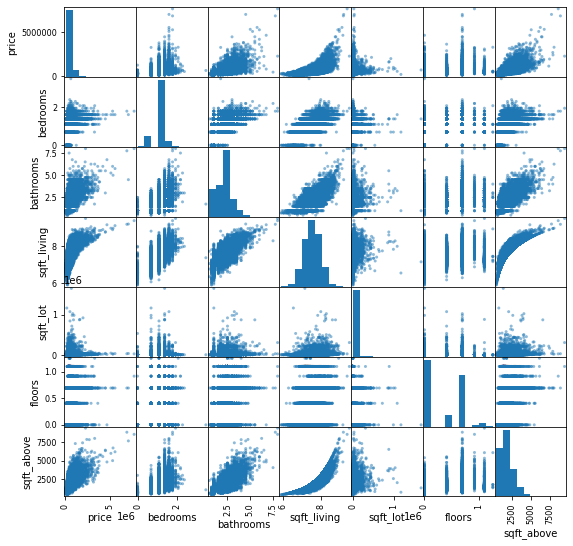

In [50]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

In [53]:
data_pred.corr()
#0.7-0.8 is considered a high correleation 
#High Correlations 
#Price x SqLiving, Bathrooms x SqLiving, Price x SqLiving
#See Below

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
price,1.000000,0.298844,0.525906,0.611839,0.089876,0.266600,0.605368
bedrooms,0.298844,1.000000,0.524353,0.648121,0.033051,0.213203,0.490785
bathrooms,0.525906,0.524353,1.000000,0.762135,0.088373,0.512789,0.686668
sqft_living,0.611839,0.648121,0.762135,1.000000,0.150102,0.393568,0.832380
sqft_lot,0.089876,0.033051,0.088373,0.150102,1.000000,0.001473,0.184139
floors,0.266600,0.213203,0.512789,0.393568,0.001473,1.000000,0.552424
sqft_above,0.605368,0.490785,0.686668,0.832380,0.184139,0.552424,1.000000


In [52]:
abs(data_pred.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
price,True,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False
sqft_living,False,False,True,True,False,False,True
sqft_lot,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False
sqft_above,False,False,False,True,False,False,True


In [54]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [55]:
df[(df.cc>.70) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.832380
"(sqft_living, bathrooms)",0.762135


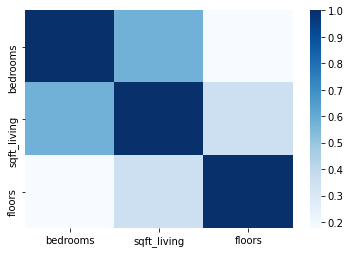

In [48]:
import seaborn as sns
sns.heatmap(data_pred.corr().abs(),cmap='Blues');

## Regression Model 1

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
#p-value: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.
#We're then going to introduce the idea of "R squared" as the coefficient of determination to quantify how well a particular line fits a particular data set.

In [59]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_above', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     4980.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:53:23   Log-Likelihood:            -3.0171e+05
No. Observations:               21597   AIC:                         6.034e+05
Df Residuals:                   21593   BIC:                         6.035e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.671e+06   6.14e+04    -27.190      

## Normality

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

In [67]:
#name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
#test = sms.jarque_bera(model.resid)
#list(zip(name, test))

name = ['price', 'sqft_living','bathrooms','sqft_above']
test = sms.jarque_bera(model.resid)
list(zip(name,test))

#This means that sqft_living is normal, bathrooms is within good range? sqft_above does not have a normal distribution 

[('price', 1809908.7027202812),
 ('sqft_living', 0.0),
 ('bathrooms', 4.085059755550636),
 ('sqft_above', 47.09691783515153)]

## Heteroscadasticity

## Second Iteration

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [30]:
print(df['price'].describe(),df['sqft_living'].describe(),df['grade'].describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64 count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64 count         21597
unique           11
top       7 Average
freq           8974
Name: grade, dtype: object


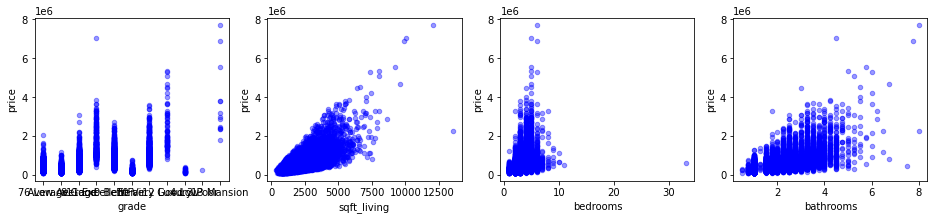

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_living', 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

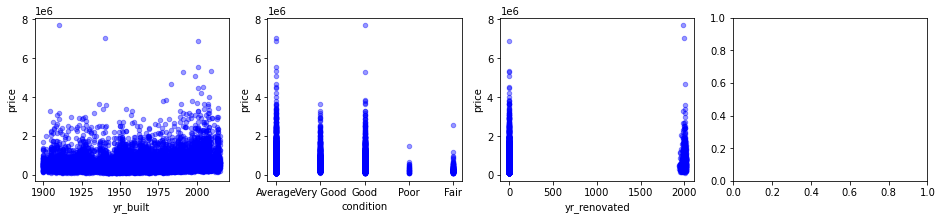

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'condition', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

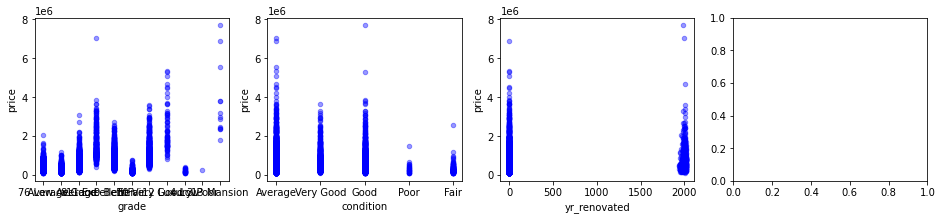

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'condition', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [34]:
grd_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
ren_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_ren', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

In [35]:
data = df.drop(['grade','yr_renovated','condition'], axis=1)

In [36]:
data = pd.concat([data, grd_dummies, ren_dummies, cond_dummies], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_ren_2010.0,yr_ren_2011.0,yr_ren_2012.0,yr_ren_2013.0,yr_ren_2014.0,yr_ren_2015.0,cond_Fair,cond_Good,cond_Poor,cond_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data = df.drop([])

In [38]:
data_pred = df[['bedrooms','sqft_living','floors']]
data_pred.head()

,bedrooms,sqft_living,floors
0,3,1180,1.0
1,3,2570,2.0
2,2,770,1.0
3,4,1960,1.0
4,3,1680,1.0


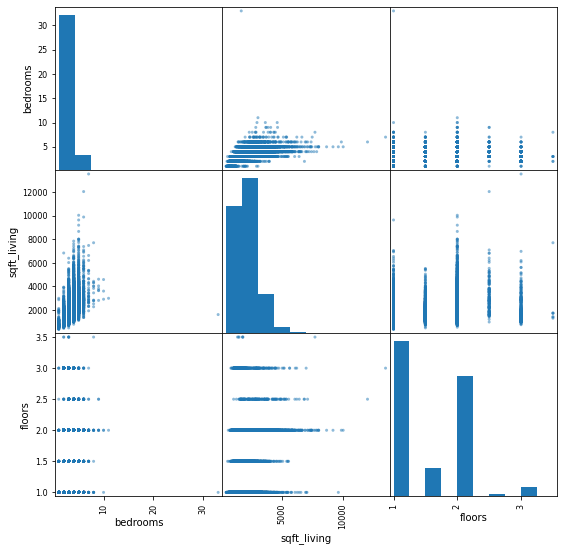

In [39]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

In [40]:
data_pred.corr()

,bedrooms,sqft_living,floors
bedrooms,1.000000,0.578212,0.177944
sqft_living,0.578212,1.000000,0.353953
floors,0.177944,0.353953,1.000000


In [41]:
abs(data_pred.corr()) > 0.70

,bedrooms,sqft_living,floors
bedrooms,True,False,False
sqft_living,False,True,False
floors,False,False,True


In [57]:
from statsmodels.formula.api import ols

## Regression Model 2

In [58]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'floors']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     4625.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:53:07   Log-Likelihood:            -3.0203e+05
No. Observations:               21597   AIC:                         6.041e+05
Df Residuals:                   21593   BIC:                         6.041e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.863e+06    4.2e+04    -92.040      

## Normality

In [73]:
name = ['price', 'bedrooms','floors','sqft_living']
test = sms.jarque_bera(model.resid)
list(zip(name,test))

[('price', 1809908.7027202812),
 ('bedrooms', 0.0),
 ('floors', 4.085059755550636),
 ('sqft_living', 47.09691783515153)]

## Third Iteration

## Modeling

## Regression Results

## Conclusion